# Análisis Exploratorio de Datos

## Objetivo del proyecto

Los nuevos medios online para reservar hoteles han cambiado de forma dramática las posibilidades de reservar habitaciones y el comportamiento de los clientes. Un gran número de las reservas de hotel son canceladas debido a cancelaciones de parte del cliente o porque éste no se presenta. Las razones típicas para las cancelaciones incluyen cambios de planes, problemas de planificación, etc. Esto a menudo es facilitado por la posiblidad de hacerlo sin cargo o a bajo costo, lo que es beneficioso para los huespedes del hotel pero es un factor menos deseable y posiblemente decreciente de ingresos para los hoteles. 

Por esto expuesto, nos proponemos como ***objetivo*** en este proyecto poder **predecir si el cliente va a cancelar la reserva o no**.

## Dataset

El dataset con el que vamos a trabajar fue obtenido de plataforma Kaggle y al que se puede acceder mediante el siguiente enlace: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

El dataset contiene diferentes atributos de los detalles de las reservas de los clientes. 

A continuación se muestra el diccionario de datos.

### Diccionario de datos:

**Booking_ID**: identificador único de cada reserva.

**no_of_adults**: número de adultos.

**no_of_children**: número de niños.

**no_of_weekend_nights**: número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para alojarse en el hotel.

**no_of_week_nights**: número de noches de la semana (lunes a viernes) que el huésped se alojó o reservó para alojarse en el hotel.

**type_of_meal_plan**: tipo de plan de comidas reservado por el cliente.

**required_car_parking_space**: ¿necesita el cliente un lugar de estacionamiento? (0 - No, 1- Sí).

**room_type_reserved**: tipo de habitación reservada por el cliente. Los valores están cifrados (codificados) por INN Hotels.

**lead_time**: número de días entre la fecha de reserva y la fecha de llegada.

**arrival_year**: año de la fecha de llegada.

**arrival_month**: mes de la fecha de llegada.

**arrival_date**: día de la fecha de llegada.

**market_segment_type**: designación del segmento de mercado.

**repeated_guest**: ¿el cliente es un húesped recurrente? (0 - No, 1- Sí)

**no_of_previous_cancellations**: número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.

**no_of_previous_bookings_not_canceled**: número de reservas anteriores no canceladas por el cliente antes de la reserva actual.

**avg_price_per_room**: precio promedio por día de la reserva. Los precios de las habitaciones son dinámicos. (En euros).

**no_of_special_requests**: número total de solicitudes especiales realizadas por el cliente (por ejemplo, piso alto, vista desde la habitación, etc.)

**booking_status**: indicador de si la reserva fue cancelada o no. 




## Importación de librerías

Importamos las librerías a utilizar

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as stats

## Importación y visualización del dataset

Leemos el dataset de un archivo csv **Hotel Reservations.csv** mediante la librería Pandas y se almacena en la variable denominada **hotel**.

In [17]:
hotel=pd.read_csv('Hotel Reservations.csv')  

Visualizamos el dataframe:

In [18]:
hotel 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## Inspección de los datos 

Accedemos a los nombres de las columnas:

In [7]:
hotel.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

Los nombres de las columnas están bien y son descriptivas los datos por lo que no cambiamos ninguno. 

Obtenemos la cantidad de filas y columnas:

In [6]:
filas, columnas = hotel.shape
print(f'Cantidad de filas: {filas}')
print(f'Cantidad de columnas: {columnas}')

Cantidad de filas: 36275
Cantidad de columnas: 19


Verificamos si exiten valores faltantes en nuestro dataframe:

In [19]:
hotel.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Como se puede observar, no hay valores faltantes en el dataset, es decir, no hay valores NaN.

Examinamos el tipo de dato de cada columna:

In [8]:
hotel.dtypes    

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

La gran mayoría de las columnas almacena datos de tipo *int*, algunas columnas tienen datos de tipo *object* que decidimos mantener así porque entendemos que es el tipo de datos para reprensentar una cadena de caracteres en Pandas, y una sola columna tiene datos de tipo *float*. Es decir, tenemos variables cuantitativas discretas y variables categóricas en su mayoría, y una sola variable cuantitativa continua.

Visualizamos las primeras 20 filas:

In [20]:
hotel.head(20)  

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


Y las últimas 20 filas:

In [21]:
hotel.tail(20)  

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36255,INN36256,2,0,2,0,Meal Plan 1,0,Room_Type 1,28,2018,9,18,Online,0,0,0,149.00,1,Not_Canceled
36256,INN36257,1,0,0,1,Meal Plan 1,0,Room_Type 1,15,2018,2,19,Corporate,0,0,0,81.00,0,Not_Canceled
36257,INN36258,2,0,0,2,Meal Plan 2,0,Room_Type 1,286,2018,9,16,Offline,0,0,0,117.00,0,Canceled
36258,INN36259,2,0,2,2,Meal Plan 1,0,Room_Type 4,40,2018,8,13,Online,0,0,0,149.40,2,Not_Canceled
36259,INN36260,3,0,0,3,Meal Plan 1,0,Room_Type 1,16,2017,9,9,Online,0,0,0,131.00,2,Not_Canceled
36260,INN36261,3,0,1,4,Meal Plan 1,1,Room_Type 4,178,2018,8,1,Online,0,0,0,137.25,1,Canceled
36261,INN36262,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
36262,INN36263,2,0,2,0,Not Selected,0,Room_Type 1,26,2018,8,7,Online,0,0,0,143.50,1,Not_Canceled
36263,INN36264,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00,0,Not_Canceled
36264,INN36265,2,0,0,2,Meal Plan 1,0,Room_Type 4,187,2018,7,8,Online,0,0,0,105.30,0,Canceled


Hasta acá podemos apreciar que tenemos un dataset bastante limpio de entrada. No consideramos necesario hacerle modificaciones por el momento y procedemos a analizar un poco más los datos.

Comenzamos utilizando la función **describe()** de Pandas que nos devuelve un resúmen estadístico del conjunto de datos.

In [22]:
hotel.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Visualización de los datos

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Antes de graficar chequeamos los tipos de datos que tenemos para saber qué tipo de gráfico es el más adecuado para el análisis.

In [35]:
hotel.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

### Diagrama de barras con *countplot()*

En este caso usamos la función ***countplot()*** de **Seaborn** para graficar un diagrama de barras para poder visualizar los valores de la variable categórica **"booking_status"**. En particular, para poder ver la cantidad de reservas cancelas y no canceladas. 

In [36]:
hotel['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

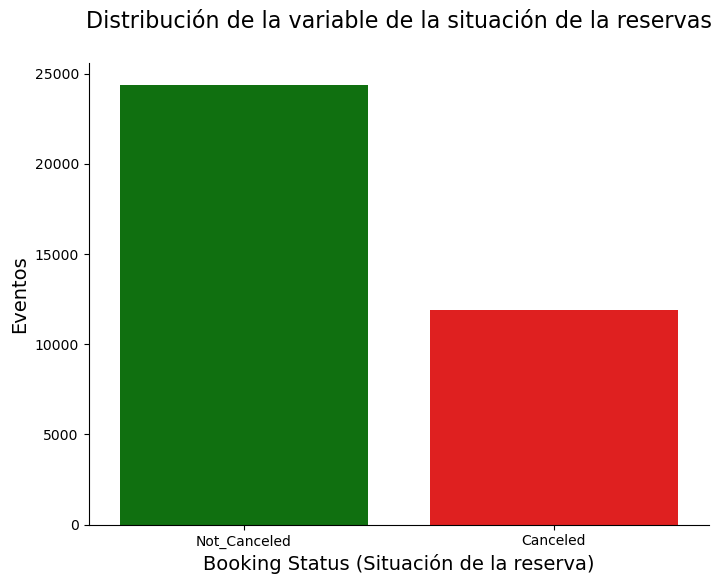

In [33]:
plt.figure(figsize=(8, 6))

color_categoria = {'Not_Canceled' : 'green', 'Canceled' : 'red' }

sns.countplot(x='booking_status', data=hotel, palette=color_categoria)

plt.title('Distribución de la variable de la situación de la reservas', size=16, pad=25)
plt.ylabel('Eventos', size=14)
plt.xlabel('Booking Status (Situación de la reserva)', size=14)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))



sns.countplot(x='no_of_previous_cancellations', data=hotel, palette=color_categoria)

plt.title('Distribución de la variable de la situación de la reservas', size=16, pad=25)
plt.ylabel('Eventos', size=14)
plt.xlabel('Booking Status (Situación de la reserva)', size=14)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

### Gráfico de cajas


Para analizar visualmente la varaible *lead_time* realizamos un gráfico de cajas y poder ver así la distribución de los datos y los valores outliers. 

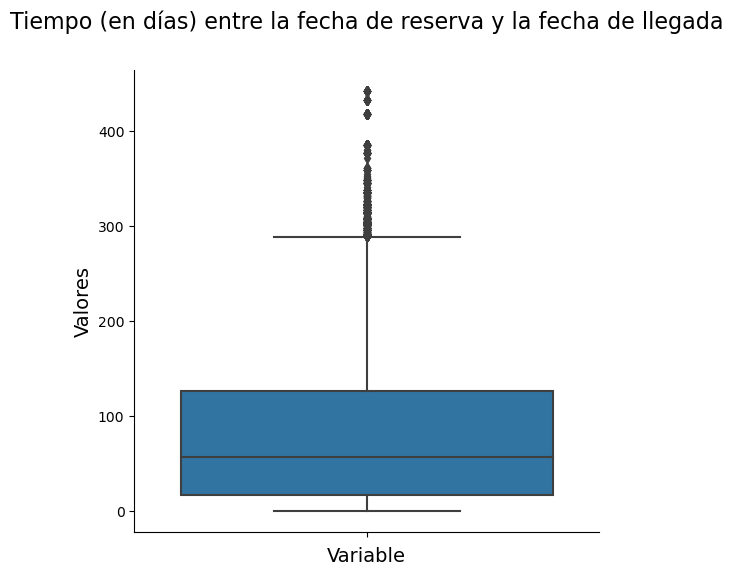

In [49]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='lead_time', data=hotel)

plt.title('Tiempo (en días) entre la fecha de reserva y la fecha de llegada', size=16, pad=30 )
plt.ylabel('Valores', size=14)
plt.xlabel('Variable', size=14)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

### Gráfico de líneas

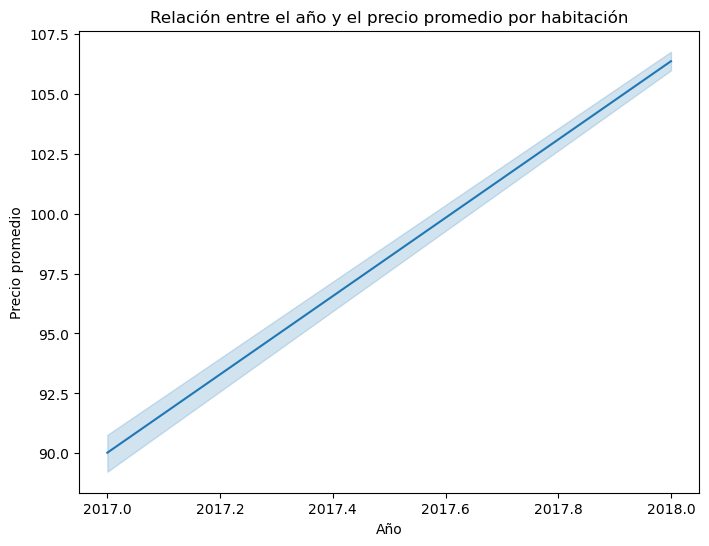

In [34]:
plt.figure(figsize=(8,6))

sns.lineplot(x='arrival_year', y='avg_price_per_room', data=hotel)

plt.title('Relación entre el año y el precio promedio por habitación')
plt.ylabel('Precio promedio')
plt.xlabel('Año')

plt.show()

### Diagrama de barras

In [8]:
hotel['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Con la función value_counts() podemos obtener de forma numérica la frecuencia para cada uno de los tipo de habitaciones que se reservan. 

Para poder analizar la variable de forma visual realizamos un diagrama de barras. 

Primero creamos un nuevo dataframe para almecenar en una columna las categorías, es decir, los distintos tipos de habitaciones, y en otra columna almacenamos la frecuencia para cada categoría. Esto lo hacemos para poder realizar el gráfico y para ello utilizamos la función **barplot()** de Seaborn

In [16]:
conteo_room_type = hotel['room_type_reserved'].value_counts()

nuevo_df = pd.DataFrame({'room_type_reserved' : conteo_room_type.index, 'frecuencia': conteo_room_type.values})
nuevo_df

,room_type_reserved,frecuencia
0,Room_Type 1,28130
1,Room_Type 4,6057
2,Room_Type 6,966
3,Room_Type 2,692
4,Room_Type 5,265
5,Room_Type 7,158
6,Room_Type 3,7


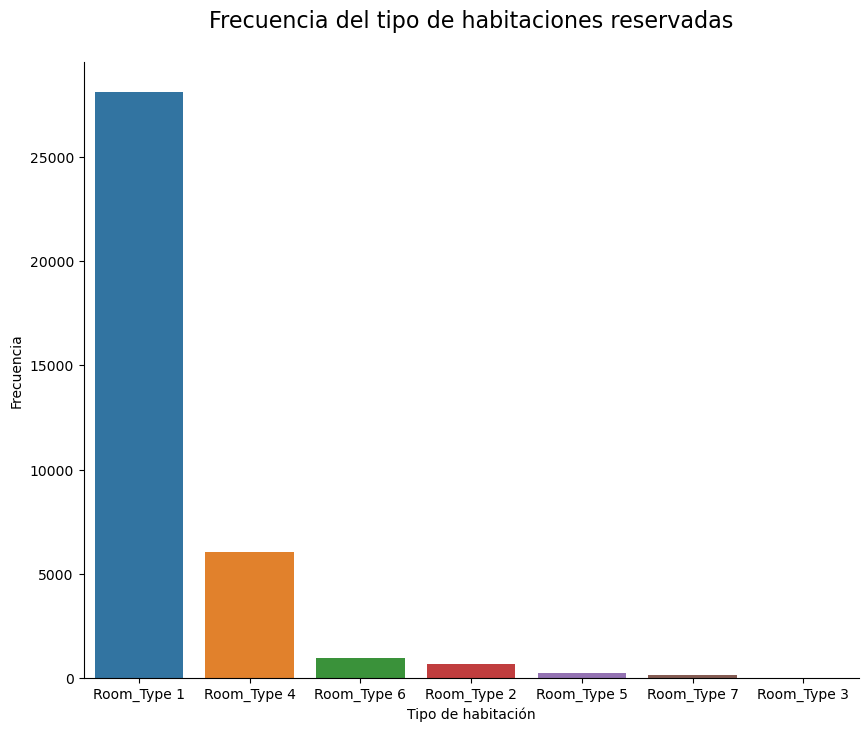

In [15]:
plt.figure(figsize=(10,8))

sns.barplot(x='room_type_reserved', y='frecuencia', data=nuevo_df)

plt.title('Frecuencia del tipo de habitaciones reservadas', size=16, pad=25)
plt.ylabel('Frecuencia')
plt.xlabel('Tipo de habitación')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

### Otro gráfico

#### **NOTA:** Quería hacer otro para visualizar la cantidad de cancelaciones previas y no cancelaciones y ver también si se podía relacionar con el booking status

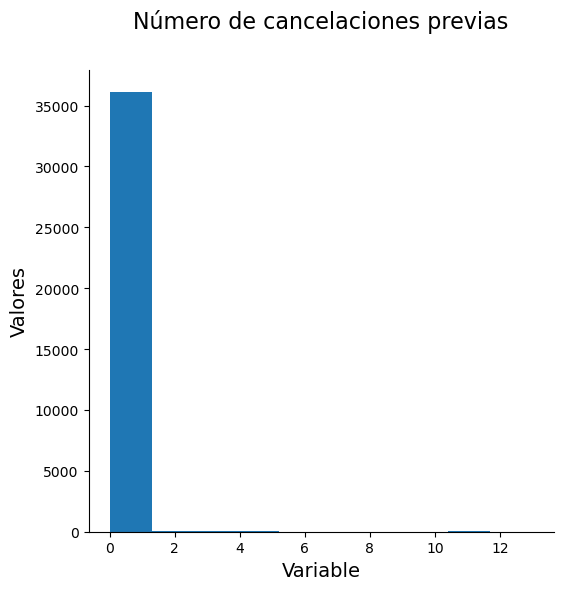

In [51]:
plt.figure(figsize=(6, 6))

plt.hist(hotel['no_of_previous_cancellations'], bins=10, )

plt.title('Número de cancelaciones previas', size=16, pad=30 )
plt.ylabel('Valores', size=14)
plt.xlabel('Variable', size=14)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

In [52]:
hotel['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64